One of the youngest ML algorithms  

First several rounds, try to classify each sample into three categories. 
For example: Minpts=3 & Radius=10

**Core Point**:
Expect at least three points within this circle of radius 10, then a core. 

**Border point**: circle with radius 10.  
If count less than three points, then it can't be a core. 
If it has a core point within circle with radius 10, then is a border point. 

**Noise Point**:  
All other points 


After classified all samples, connect all the core points if they are within the radius of eachother.   
Associate border points to the same cluster as the corresponding core points. 


#  Density-based Spatial Clustering of Applications with Noise (DBSCAN)

In DBSCAN, a special label is assigned to each sample (point) using the following criteria:
- A point is considered as core point if at least a specified number (MinPts) of neighboring points fall within the specified radius ε
- A border point is a point that has fewer neighbors than MinPts within ε ,  but lies within the ε  radius of a core point
- All other points that are neither core nor border points are considered as noise points (outliers)

After labeling the points as core, border, or noise points, the DBSCAN algorithm can 
be summarized in two simple steps:

1. Form a separate cluster for each core point or a connected group of core points (core points are connected if they are no farther away than ε ).
2. Assign each border point to the cluster of its corresponding core point.

To get a better understanding of what the result of DBSCAN can look like before 
jumping to the implementation, let's summarize what you have learned about core 
points, border points, and noise points in the following figure:
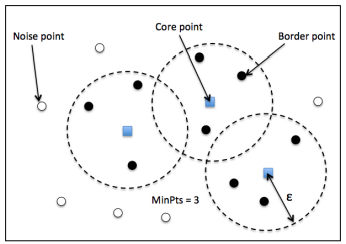

In [1]:
#cannot connect two left cores because they do not fall within eachother's radii
#hypothetically, if there were a core point in the overlap of the two left dashed circles, could connect all three to one cluster
    #all nearby border points would all then belong to that cluster. 

#don't give cluster labels to noise

One of the main advantages of using DBSCAN is that it **does not assume that the 
clusters have a spherical shape** as in k-means. Furthermore, DBSCAN is different 
from k-means and hierarchical clustering in that it **doesn't necessarily assign each 
point** to a cluster but is capable of removing noise points.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

For a more illustrative example, let's create a new dataset of half-moon-shaped 
structures. As we can see in the resulting plot, there are two visible, half-moon-shaped groups 
consisting of 100 sample points each:

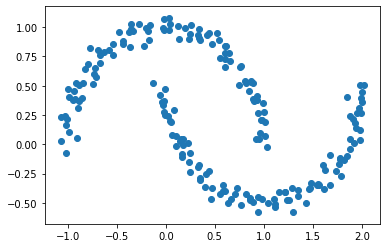

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
X

array([[ 0.81680544,  0.5216447 ],
       [ 1.61859642, -0.37982927],
       [-0.02126953,  0.27372826],
       [-1.02181041, -0.07543984],
       [ 1.76654633, -0.17069874],
       [ 1.8820287 , -0.04238449],
       [ 0.97481551,  0.20999374],
       [ 0.88798782, -0.48936735],
       [ 0.89865156,  0.36637762],
       [ 1.11638974, -0.53460385],
       [-0.36380036,  0.82790185],
       [ 0.24702417, -0.23856676],
       [ 1.81658658, -0.13088387],
       [ 1.2163905 , -0.40685761],
       [-0.8236696 ,  0.64235178],
       [ 0.98065583,  0.20850838],
       [ 0.54097175,  0.88616823],
       [ 0.348031  , -0.30101351],
       [ 0.35181497,  0.88827765],
       [-0.77708642,  0.82253872],
       [ 1.92590813,  0.01214146],
       [ 0.86096723, -0.47653216],
       [ 0.19990695,  0.99672359],
       [ 1.2895301 , -0.37071087],
       [-0.27847636,  1.02538452],
       [ 0.24187916, -0.07627812],
       [ 1.84988768, -0.09773674],
       [ 1.88406869,  0.0449402 ],
       [ 0.165822  ,

### Kmeans does not work well:

Let's try to cluster the dataset into 2 clusters with Kmeans and see what we get:

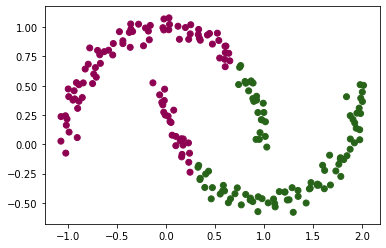

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) #know only two clusters
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='PiYG')

In [11]:
#bad results
#KMeans expecting shape of the clusters to be round/roundish
    #because centroid is mean of all the samples of the clusters
    

### DBSCAN
Let's try the DBSCAN algorithm on this dataset to see if it can find the two 
half-moon-shaped clusters using a density-based approach:

In [12]:
#can do moon shaped clusters with DBscan, because when connecting nearby cores regardless of shape/direction

In [13]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean') #eps=radius. By eyeballing. #range of x and y not exactly the same
                                                        #usually want to do standard scaler, didn't in this case
db

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

#### Discuss: 
Based on the parameters eps=0.2, min_samples=5, how do we explain this DBSCAN model to others?

In [14]:
labels = db.fit_predict(X) #get cluster labels of dbscans

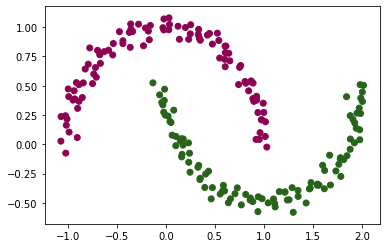

In [15]:
plt.scatter(X[:,0],X[:,1],c=labels,cmap='PiYG') #visualize 

In [8]:
db.labels_

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [16]:
np.unique(db.labels_) #showing two different cluster labels

array([0, 1], dtype=int64)

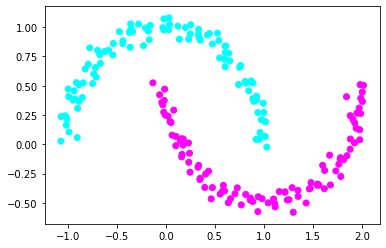

In [25]:
# let's try to reduce the eps and find some outliers
#more likely to have noise when reduce eps. More likely to have borders with smaller eps as well. 
db = DBSCAN(eps=0.15, min_samples=5, metric='euclidean')
labels = db.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,cmap='cool')

In [26]:
db.labels_ #noise negative one

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1], dtype=int64)

In [27]:
# let's create a mask which can help us filter the noise data
#true means it is NOT noise, false means it is a noise
mask = db.labels_!=-1
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [28]:
# apply the mask to the X dataset
X = X[mask] #filter out all the noise data detected by DBscan

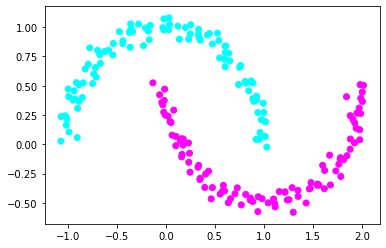

In [29]:
labels = db.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,cmap='cool')

## Exercise
The t4.8k dataset.

In [58]:
import pandas as pd
# Load the t4.8 data set #used a lot for clustering algorithms
df = pd.read_csv("datasets/t4.8k.txt", sep=" ", names=['x','y'])
df.head()

,x,y
0,68.601997,102.491997
1,454.665985,264.808990
2,101.283997,169.285995
3,372.614990,263.140991
4,300.989014,46.555000


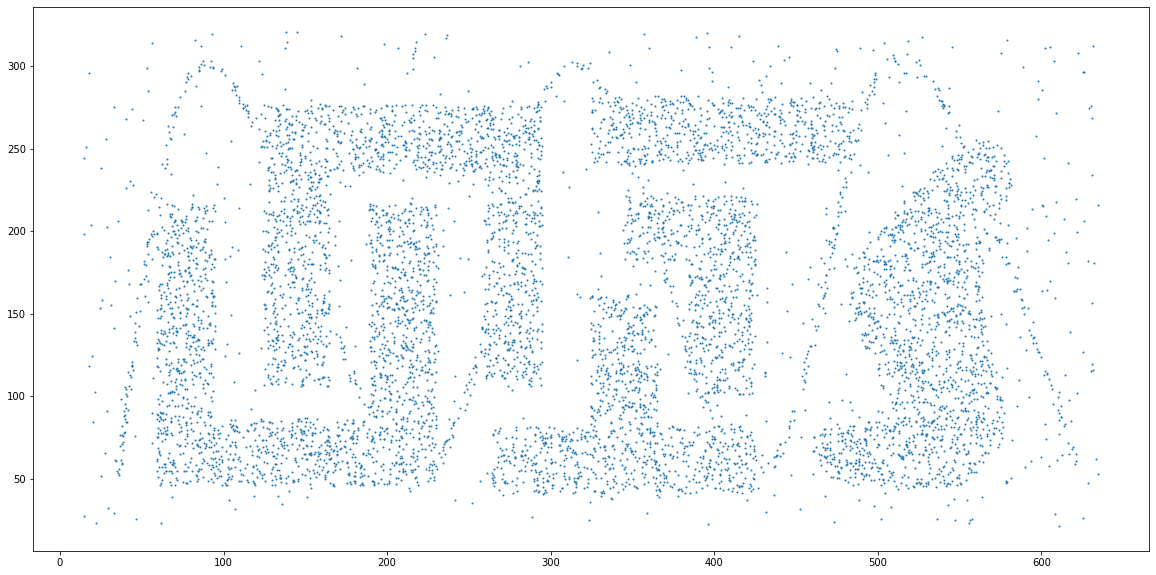

In [60]:
# visualize the t4.8 data set first
# you need to make the plot big enough
plt.figure(figsize=(20,10))
# A little trick here:
# make the dots of the scatter plot smaller
# read the document of scatter(): https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

#didn't do standard scaler because scope of x and y close to eachother

plt.scatter(df.x, df.y, s=1)

In [61]:
#cosine curve behind clusters

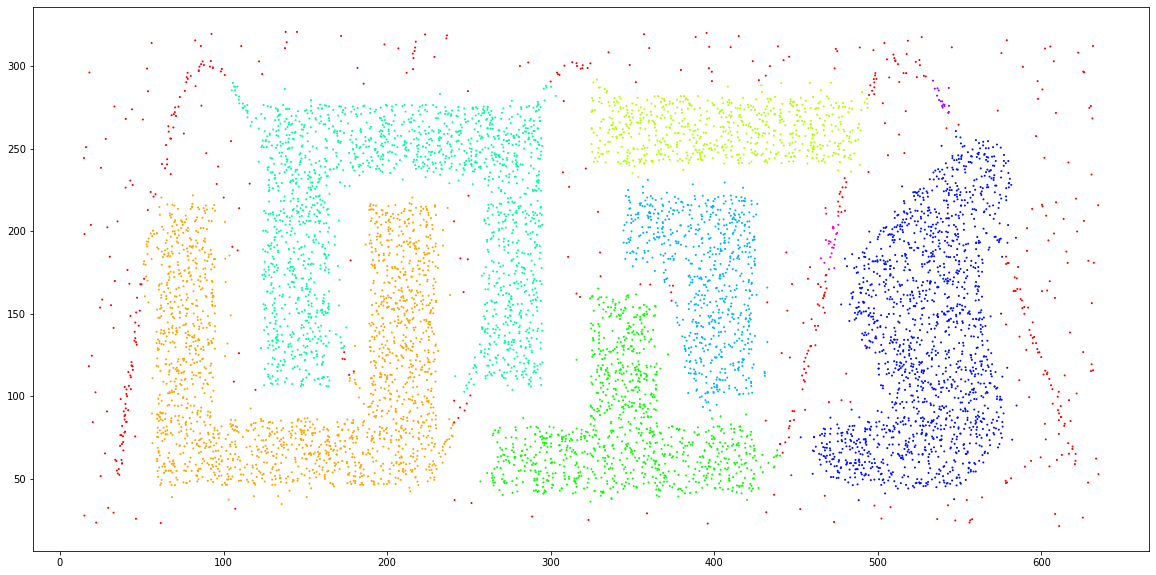

In [62]:
# you need to make the plot big enough
plt.figure(figsize=(20,10))
# Create a DBSCAN model,
# specify a eps and a min_samples based on your observation
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=15, metric='euclidean') #try a bunch of hyperparameters
db


# plot the clustering results.
# There could be a big number of clusters, try to pick a color map works for you:
# https://matplotlib.org/examples/color/colormaps_reference.html

labels = db.fit_predict(df)
plt.scatter(df.x, df.y ,s=1, c=labels,cmap='hsv')


In [64]:
# get the cluster labels as variable name "labels"
labels = db.labels_

In [65]:
# find the unique vlaues of labels
# you can see how many cluster you have created
# it is okay if you get a different result
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [66]:
# create a mask based on whether the sample is a noise (false) or not (true)
mask = db.labels_!=-1
mask

# check how many of the sample will be considered as noise
unique, counts = np.unique(mask, return_counts=True)
dict(zip(unique, counts))

{False: 507, True: 7493}

In [67]:
# apply the mask to the dataset
df = df[mask]

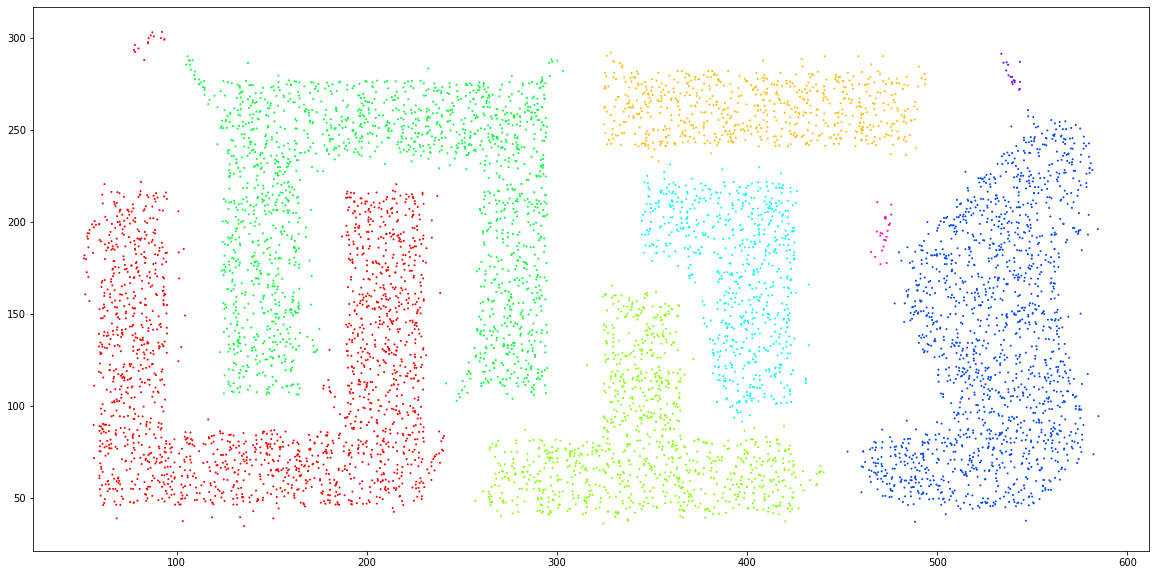

In [73]:
# after removing the noice data, try cluter the samples again and visualize the result
plt.figure(figsize=(20,10))
labels=db.fit_predict(df)
plt.scatter(df.x, df.y, s=1, c=labels, cmap='hsv')

## Discuss:
It is also common that we want to drop the smaller clusters, how can we find the smaller clusters? (or, how can we count the samples for each cluster label?)

In [22]:
unique, counts = np.uniques(labels, return_counts=True)
#give me how many samples in each cluster

{0: 1820, 1: 663, 2: 987, 3: 1711, 4: 667, 5: 1590, 6: 17, 7: 23, 8: 15}

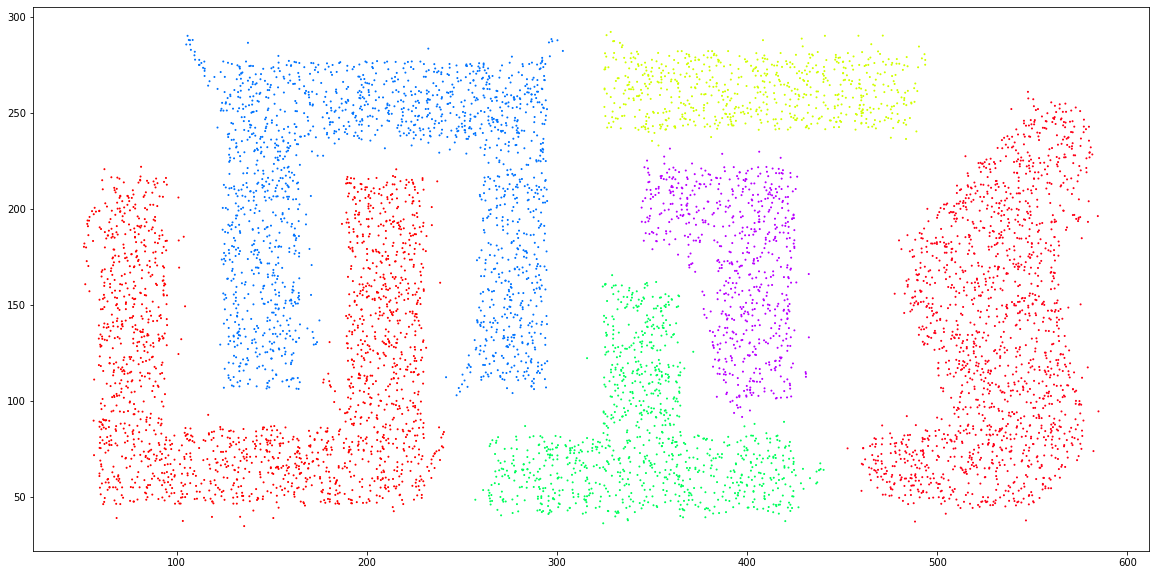

In [74]:
mask = labels < 6
df=df[mask] #throw away samples if cluster labels are 6 or higher
plt.figure(figsize=(20,10))
labels=db.fit_predict(df)
plt.scatter(df.x, df.y, s=1, c=labels, cmap='hsv')

6 clusters in eliptical shapes  
    Shape is not problem- problem is the density with varied density
   
   Varied density within different clusters

## Discuss:
What are the pros and cons you can see on DBSCAN? (also consider the cluster shown in the Japanese goldfish dataset):
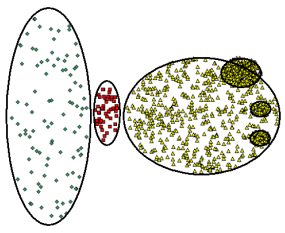

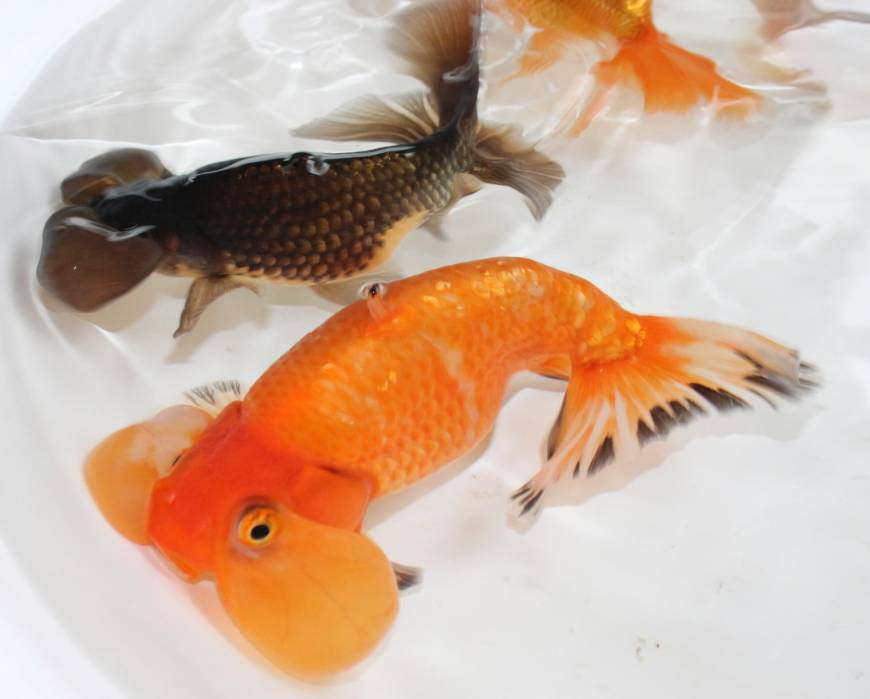

Pros:
- can handle clusters of any shape -- don't have to assume clusters are around
- does not cluster all the samples -- good for noisy data, and don't have to assign to cluster and change shape of cluster
    - can be used for outlier detection!

Cons:
- sensitive to parameters -- have to try different combinations of hyperparameters 
- cannot handle varying densities

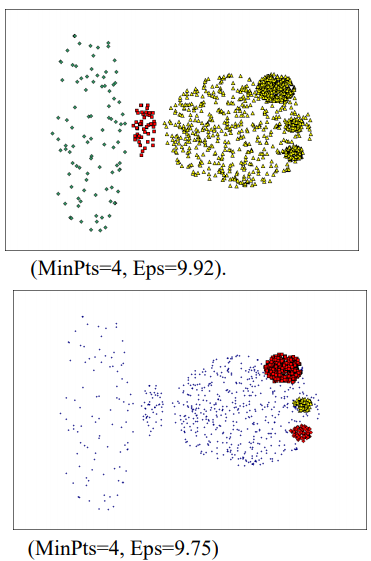

In [ ]:
#top one- eyes and nose put with body
#bottom one: eyes and nose all different cluster but body and tail all 'noise'

## Time/Space complexity of DBSCAN

General process of DBSCAN:

1) Use MinPts and ε to label all the samples

2) for each core without cluster label, assign a cluster lable to it and connect all the cores if their distances are smaller than ε

3) assign borders to the nearest core's cluster label

### Time complexity:

1) building a m-by-m distance matrix: O(dm^2)

2) labeling one sample (core/border/outlier): O(m)

labling all m samples: O(m^2)

3) assign clusters to each sample: O(m^2)

Overall time complexity: O(dm^2). If we take d as constant, then the time complexity is O(m^2)

Notes: d: number of features, M is number of samples. Usually have much higher M than d (more samples)
    >squre time algoirthm
### Discuss: DBSCAN and Kmeans, which is faster?

In practice, consider Kmeans linear time alogirth. Dbscan is squared, so dbscan is SLOWER so it struggles more with larger datasets. 

### Space complexity:

The distance matrix take O(m^2) memory space.

Have to build a m by m matrix. 

## To sum up:
Density-Based Spatial Clustering of Applications with Noise(DBSCAN)
- Finds core samples of high density and expands clusters from them. 
    - core
    - border
    - noise
- Good for data which contains clusters of similar density.